In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
training_data= pd.read_csv("/content/drive/MyDrive/Movie Genre Dataset/Genre Classification Dataset/train_data.txt", sep=':::', names=['Title','Genre', 'Description'], engine='python')
training_data.head()



,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
testing_data= pd.read_csv("/content/drive/MyDrive/Movie Genre Dataset/Genre Classification Dataset/test_data.txt", sep=':::', names=['Title', 'Description'], engine='python')
testing_data.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


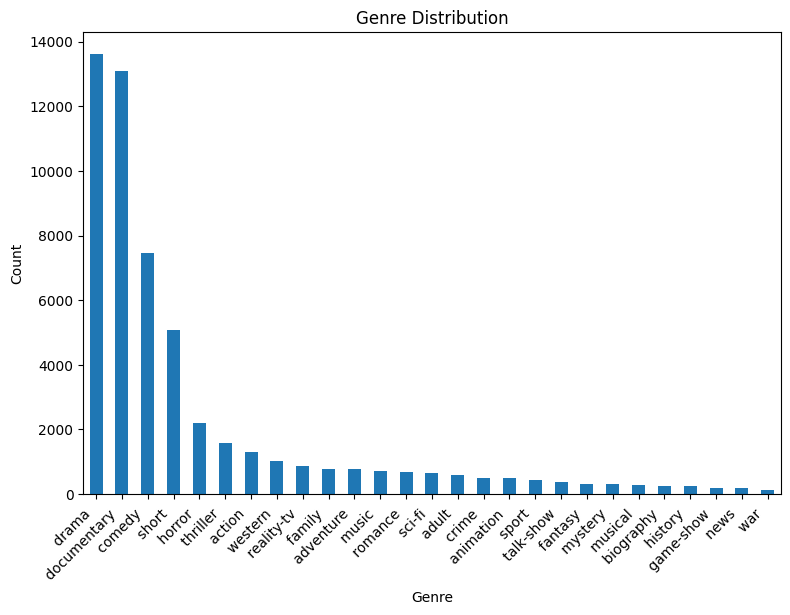

In [ ]:
plt.figure(figsize=(9, 6))
genre_counts = training_data["Genre"].value_counts()
genre_counts.plot(kind="bar")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
from re import X
tfidf_vectorizer = TfidfVectorizer(max_features=7000, stop_words='english')
X_train = tfidf_vectorizer.fit_transform(training_data['Description'])
y_train = training_data['Genre']

In [ ]:
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [ ]:
X_test = tfidf_vectorizer.transform(testing_data['Description'])


In [ ]:
predictions = clf.predict(X_test)


In [ ]:
predicted_data = pd.DataFrame({'Title': testing_data['Title'], 'Predicted_Genre': predictions})

In [ ]:
print(predicted_data)

                                  Title Predicted_Genre
1                 Edgar's Lunch (1998)           drama 
2             La guerra de papá (1977)           drama 
3          Off the Beaten Track (2010)     documentary 
4               Meu Amigo Hindu (2015)           drama 
5                    Er nu zhai (1955)           drama 
...                                 ...             ...
54196   "Tales of Light & Dark" (2013)           drama 
54197      Der letzte Mohikaner (1965)           drama 
54198              Oliver Twink (2007)           drama 
54199                Slipstream (1973)           drama 
54200        Curitiba Zero Grau (2010)     documentary 

[54200 rows x 2 columns]


In [ ]:
test_data_solution = pd.read_csv("/content/drive/MyDrive/Movie Genre Dataset/Genre Classification Dataset/test_data_solution.txt", sep=':::', names=['Title','Genre', 'Description'], engine='python')
test_data_solution

,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
test_data_solution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54200 entries, 1 to 54200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54200 non-null  object
 1   Genre        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
true_labels = test_data_solution['Genre']
classification_rep = classification_report(true_labels, predictions)
print("Classification Report:\n", classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
                precision    recall  f1-score   support

      action        0.59      0.11      0.18      1314
       adult        0.55      0.06      0.10       590
   adventure        0.85      0.08      0.15       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.52      0.44      0.47      7446
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.88      0.69     13096
       drama        0.46      0.83      0.59     13612
      family        0.00      0.00      0.00       783
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.30      0.45       193
     history        0.00      0.00      0.00       243
      horror        0.72      0.36      0.48      2204
       music        0.79      0.09      0.16       731
     musical        0.00      0.00      0.00       276
     mystery        0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
